# Úloha 8: Ortogonální polynomy
*(QR-faktorizace, integrace)*

Napište vlastní proceduru pro provedení **QR-faktorizace**
(modifikovanou Gramovou–Schmidtovou nebo Householderovou metodou)
a otestujte, že správně funguje, tj. že pro náhodně zvolenou matici
dostanete faktory:

- jeden **ortogonální**,
- druhý **horní trojúhelníkovou matici**,

a že jejich součin se liší od původní matice jen málo
(vlivem zaokrouhlovacích chyb).





In [3]:
import numpy as np

def mod_gs(col_v):
    col_v = col_v.T.astype(np.float64)
    col_u = col_v.copy()
    for i in range(col_v.shape[0]):
        u = col_u[i].copy()
        for j in range(i):
            u-=np.dot(col_u[j], u)*col_u[j]
        u/= np.linalg.norm(u)
        col_u[i] = u
    return col_u.T

def house_holder(a):
    m,n = a.shape
    assert m>=n
    for i in range(1,n):
        x = a[i:m][i]
        print(x)
    return


a = np.random.randint(3, size=(4,4))
print(a)
house_holder(a)
# while(np.linalg.matrix_rank(a)!=a.shape[1]):
#     a = np.random.randint(3, size=(101,101))
# print(a)
# gs = mod_gs(a)
# print(gs)
# G = gs.T @ gs
# print("Orthonormality of vectors: ", np.allclose(G, np.eye(G.shape[0]),atol= tol))
# norms = np.linalg.norm(gs, axis=0)
# print("Norm of vectors: ", norms)

tol = 1e-14

def qr_factor(a):
    q = mod_gs(a)
    m,n = a.shape
    print("Q^TQ = I: ", np.allclose(q.T@q, np.eye(min(m,n)), atol=tol))
    r = q.T @ a
    print("QR = A: ", np.allclose(q@r, a.astype(np.float64), atol=tol))

    return q,r

# np.set_printoptions(precision=3)
# m,n = 500,400
# low, high = 0,10
# a = np.random.uniform(low, high, size=(m,n))
# q,r = qr_factor(a)


[[1 0 2 0]
 [1 2 1 2]
 [1 2 2 0]
 [1 0 0 0]]
[1 2 2 0]


IndexError: index 2 is out of bounds for axis 0 with size 2

---

## Vandermondova matice

Aplikujte program na **Vandermondovu matici**

\[
\begin{pmatrix}
1 & x_0 & x_0^2 & \dots & x_0^N \\
1 & x_1 & x_1^2 & \dots & x_1^N \\
\vdots & \vdots & \vdots &        & \vdots \\
1 & x_M & x_M^2 & \dots & x_M^N
\end{pmatrix}
\]

Pomocí **Gramovy–Schmidtovy ortogonalizace** dostanete
**Legendrovy polynomy** (sloupce matice \(Q\)).

---

## Volba bodů

Body $x_0, \dots, x_M$ volte tak, aby rovnoměrně pokrývaly interval
\([-1, 1]\) s krokem $0{,}02$, tj.

$
M = 101
$

Nakreslete získané polynomy $P_l(x)$ pro $l = 0,1,...,5$, přičemž je normujte tak, aby $P_l(1) = 1$.
## Alternativní výpočet – Bonnetův vzorec

Napište funkci, která alternativně vypočte tyto polynomy
s použitím **Bonnetova vzorce**

$$
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
$$

a nakreslete výsledek do **stejného grafu**.

---


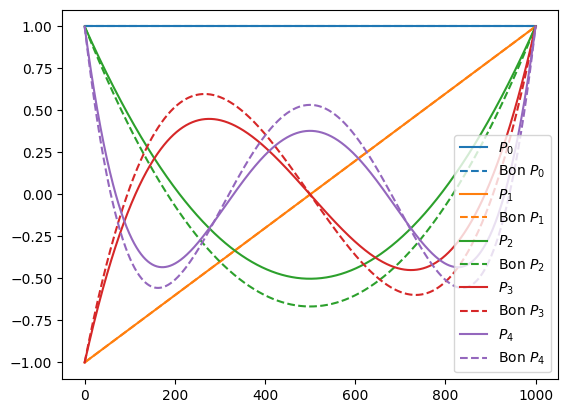

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

inter = np.linspace(-1,1,101)
Vander = np.array([[x**n for n in range(len(inter))] for x in inter ])
q_vander = mod_gs(Vander)
leg_van = [[q_vander[:,i]/q_vander[-1][i]] for i in range(5)]

def bonnet():
    leg_bon = np.zeros(shape=(5, len(inter)))
    leg_bon[0] = np.array([1 for x in inter])
    leg_bon[1] = inter
    for n in range(2, 5):
        leg_bon[n] = ((2*n+1)*inter*leg_bon[n-1]-n*leg_bon[n-2])/(n+1)
    return leg_bon
leg_bon = bonnet()

for i in range(len(leg_van)):
    line,   = plt.plot(leg_van[i][0], label=fr"$P_{i}$")
    plt.plot(leg_bon[i], label=fr"Bon $P_{i}$" ,ls = '--', color = line.get_color())
plt.legend()



## Diskuze výsledků

Diskutujte rozdíly výsledků obou metod:

- Jak se změní, pokud volíme $M = 1001$?
- Jak souvisí tento rozdíl s chybou kvadraturního vzorce?
- Modifikujte Vandermondovu matici tak, abyste zmenšili chybu
  polynomů nalezených QR faktorizací.

---

## Nápověda

Ortogonalita sloupců v matici $Q$ **neodpovídá přesné ortogonalitě
polynomů** ve smyslu $L^2$ skalárního součinu.

Porovnejte s kvadraturním vzorcem – **lichoběžníkové pravidlo**.